In [6]:
import skrf as rf
from skrf.calibration import TwelveTerm
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

s_short=rf.Network('cal_stds/short.s2p')
s_open=rf.Network('cal_stds/open.s2p')
s_load=rf.Network('cal_stds/load.s2p')
s_through=rf.Network('cal_stds/through.s2p')

ideals=[s_short, s_open, s_load, s_through]

m_short=rf.Network('cal_bpf/short2.s2p')
m_open=rf.Network('cal_bpf/open2.s2p')
m_load=rf.Network('cal_bpf/load2.s2p')
m_through=rf.Network('cal_bpf/through2.s2p')

measured=[m_short, m_open, m_load, m_through]
cal = TwelveTerm(ideals = ideals, measured = measured)
cal.run()

Success
Success
Success
Success


/home/bjohan/.local/lib/python3.10/site-packages/skrf/calibration/calibration.py:1445: UserWarning: n_thrus is None, guessing which stds are transmissive
  warn('n_thrus is None, guessing which stds are transmissive')


In [50]:


m_filter1=rf.Network('bpf_measure2/m_filter_1.s2p')
m_filter2=rf.Network('bpf_measure2/m_filter_2.s2p')
m_filter3=rf.Network('bpf_measure2/m_filter_3.s2p')
m_filter4=rf.Network('bpf_measure2/m_filter_4.s2p')
m_filter5=rf.Network('bpf_measure2/m_filter_5.s2p')
m_filter6=rf.Network('bpf_measure2/m_filter_6.s2p')
m_filter7=rf.Network('bpf_measure2/m_filter_7.s2p')
m_filter8=rf.Network('bpf_measure2/m_filter_8.s2p')
m_filter9=rf.Network('bpf_measure2/m_filter_9.s2p')

filters=[]
for i in range(11):
    filters.append(rf.Network('bpf_measure2/m_filter_%x.s2p'%(i+1)))


/tmp/ipykernel_25646/3975636097.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure();


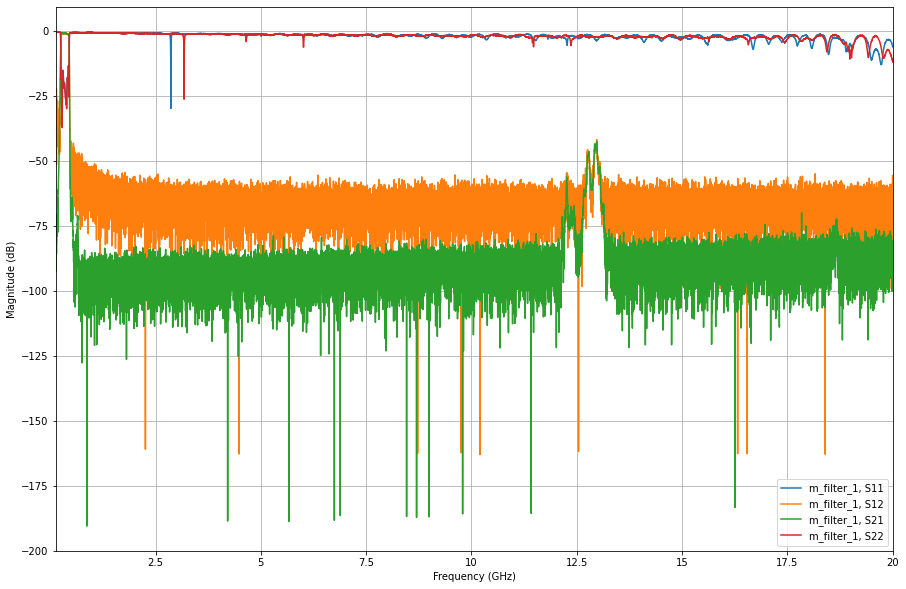

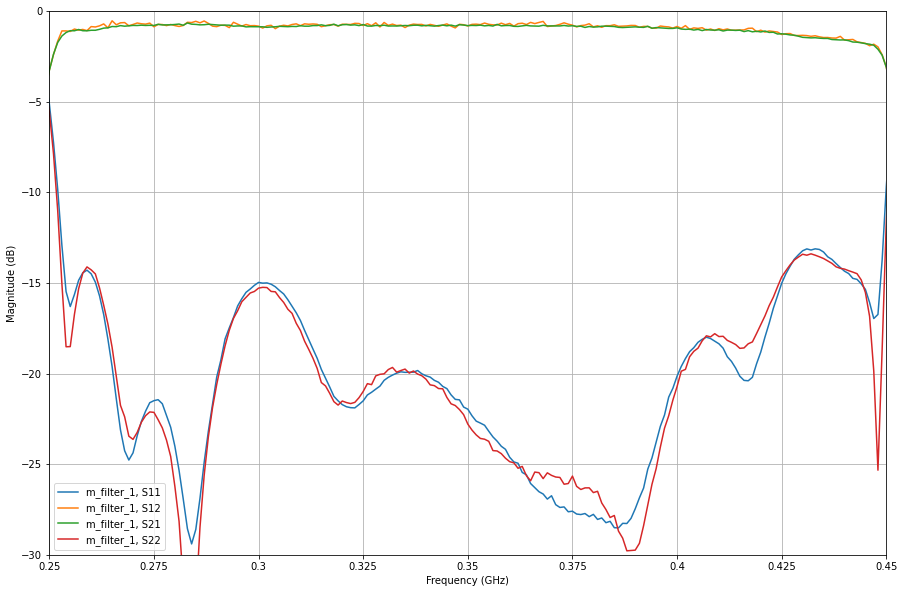

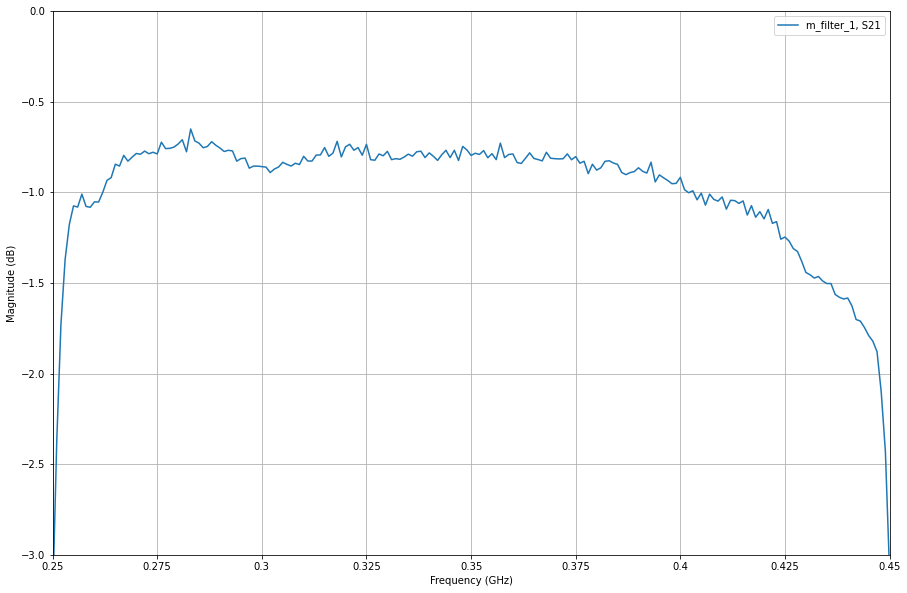

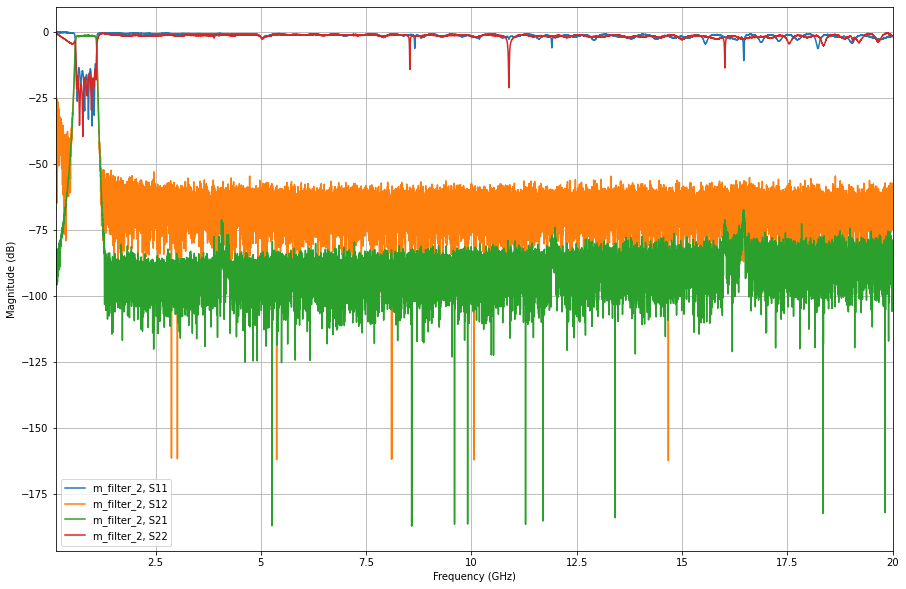

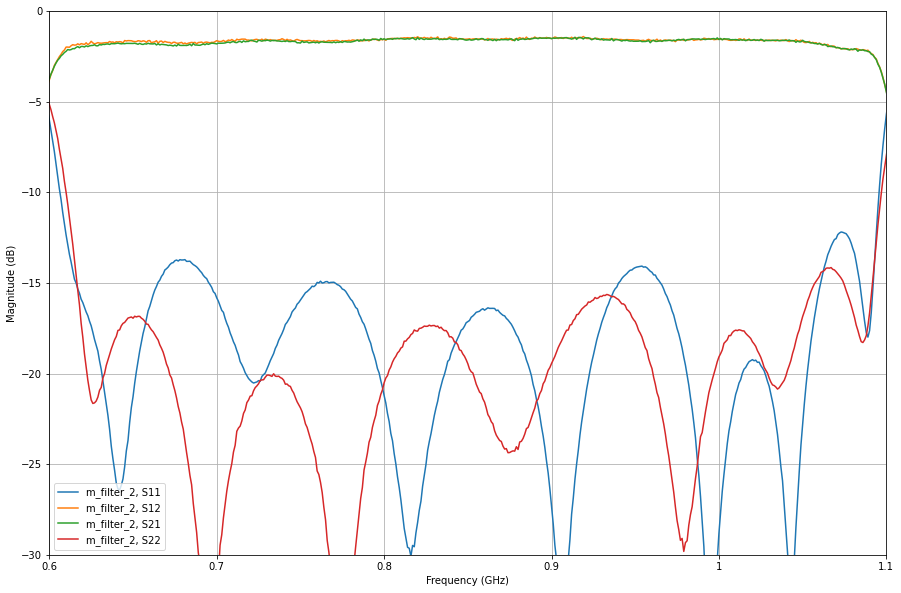

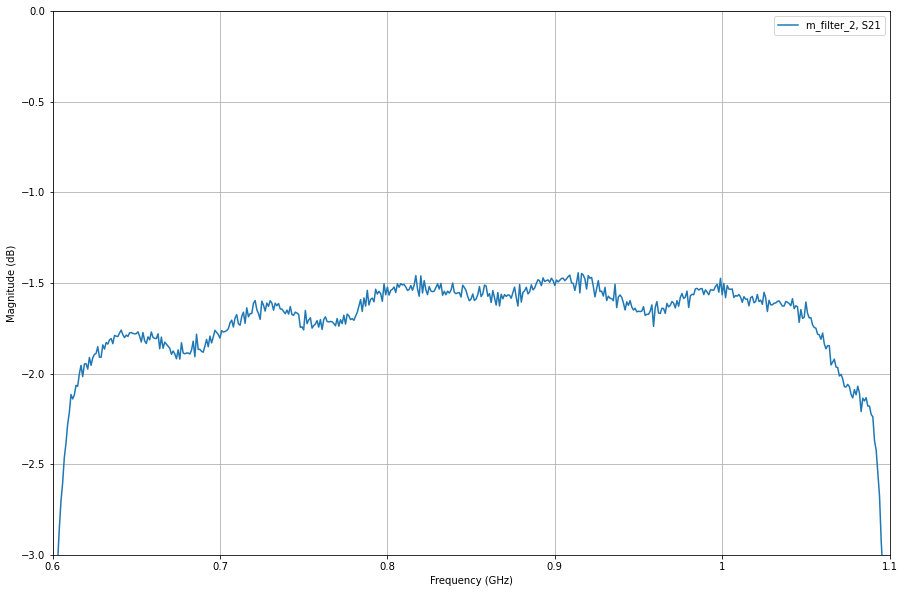

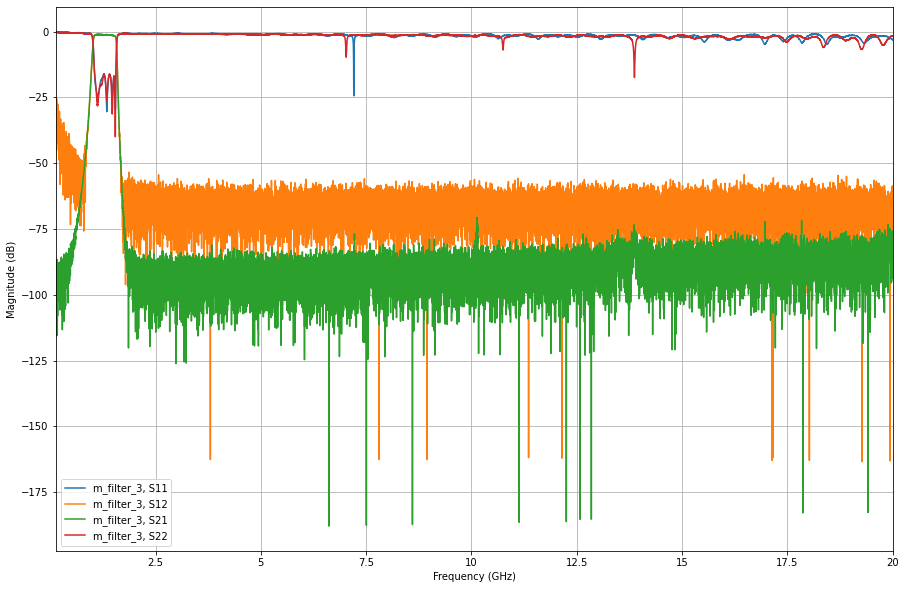

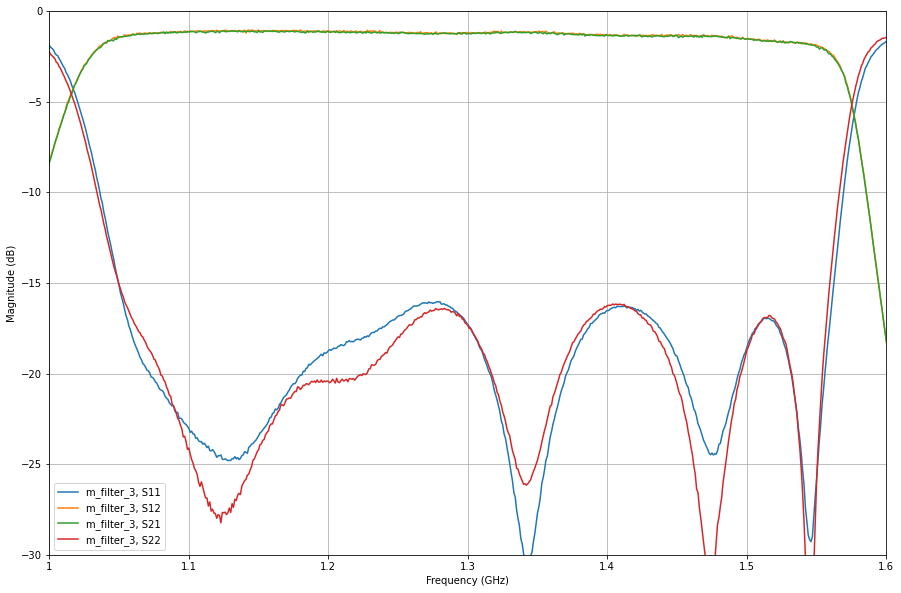

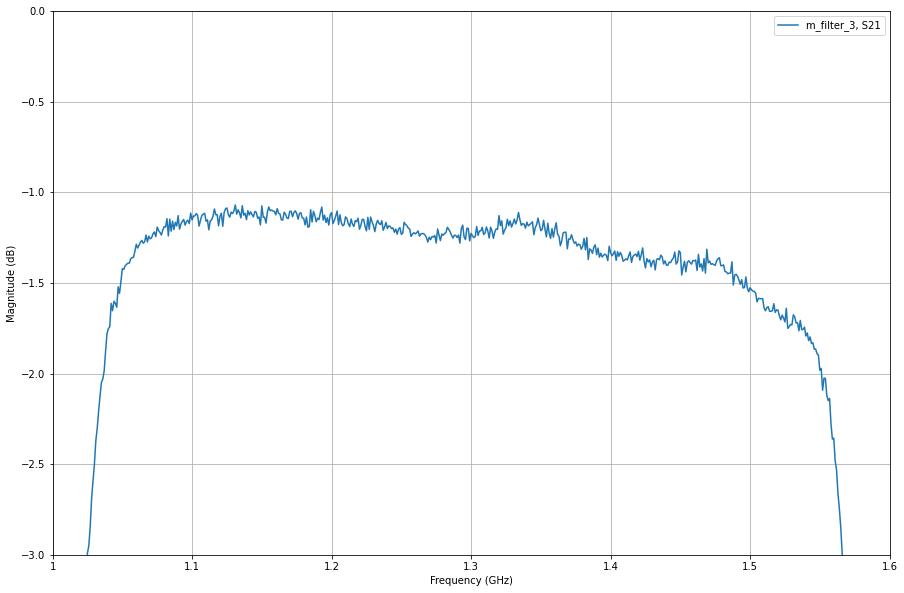

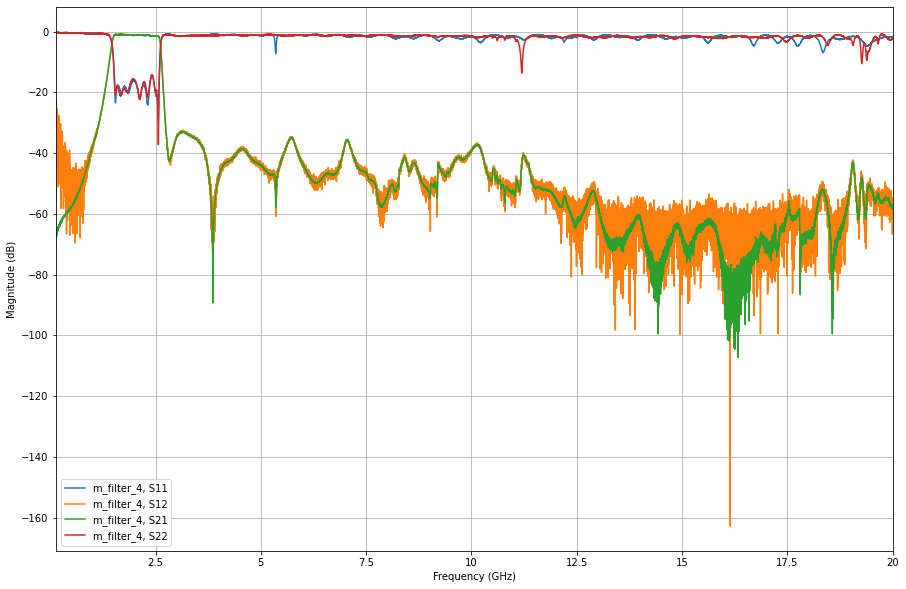

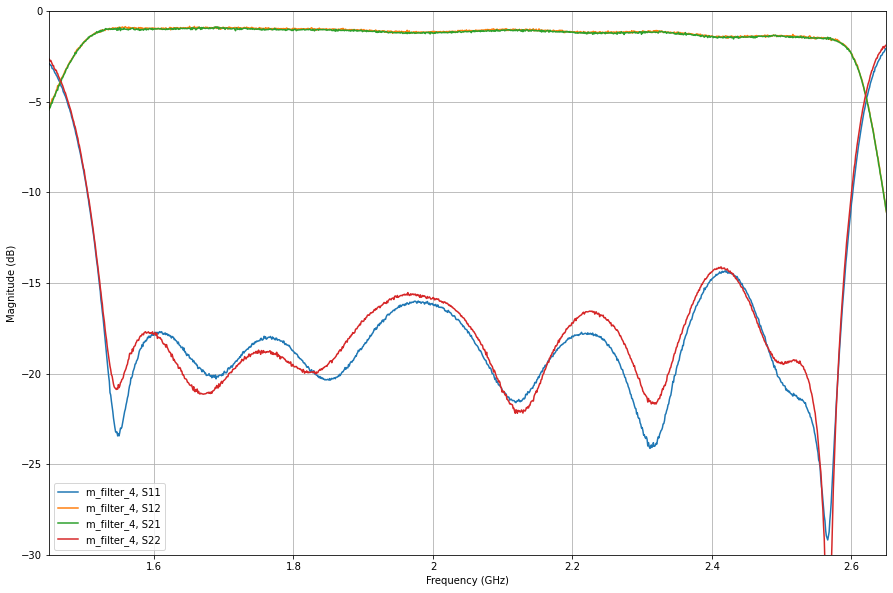

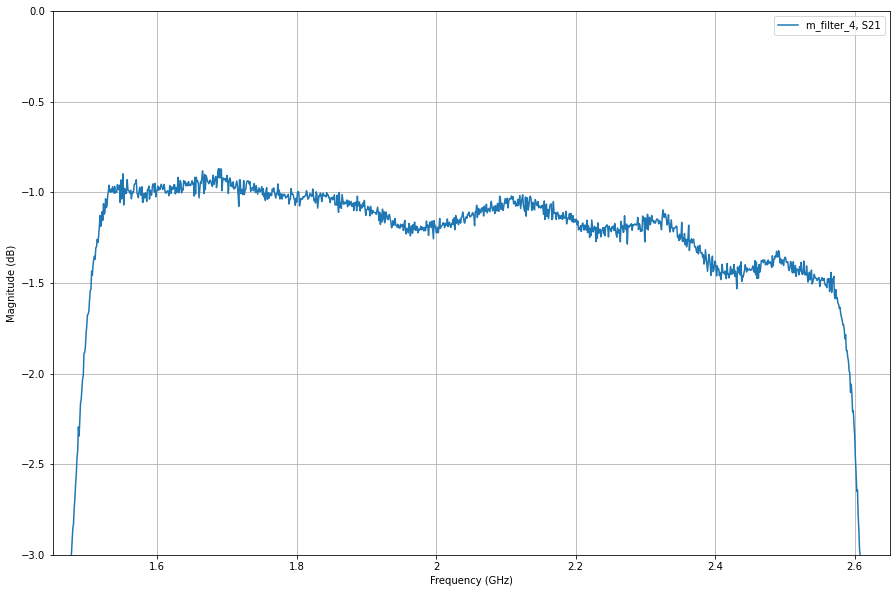

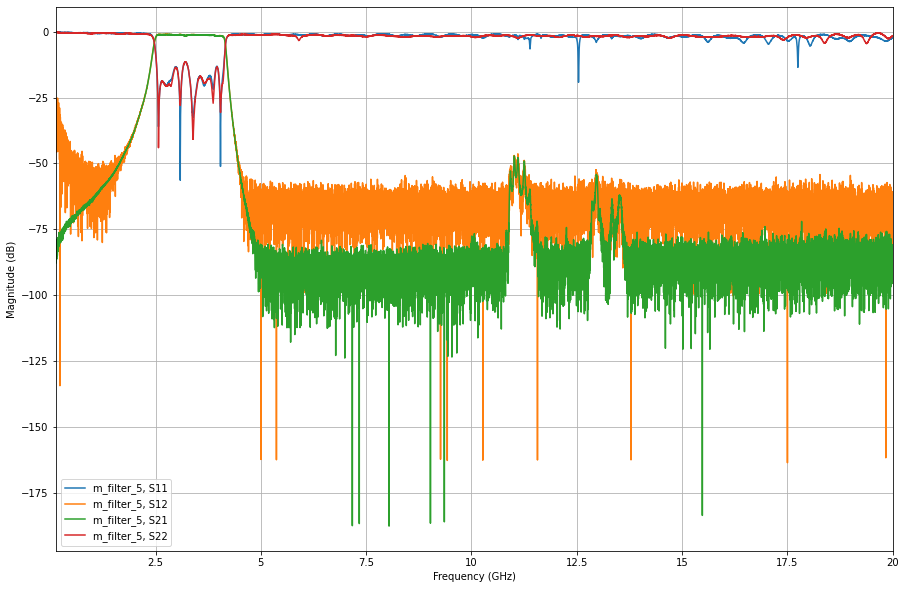

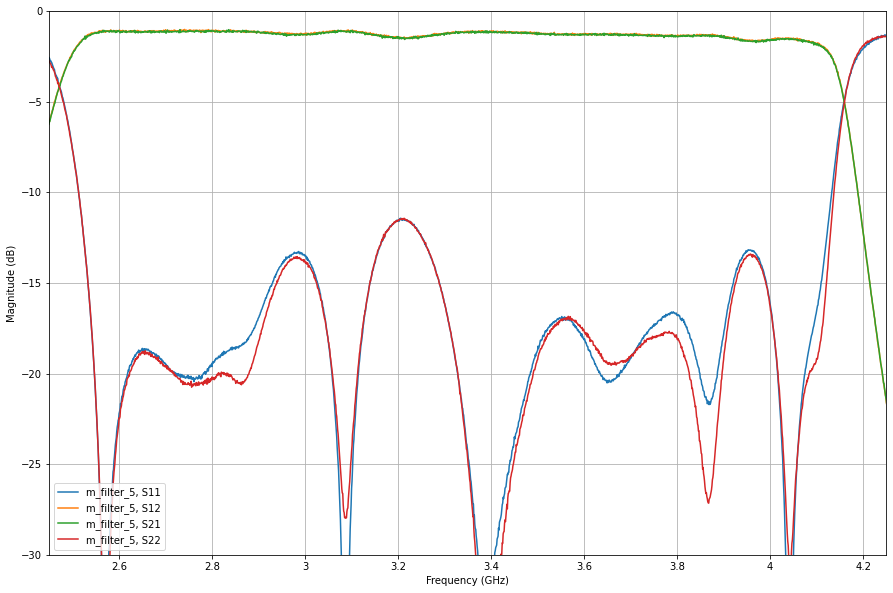

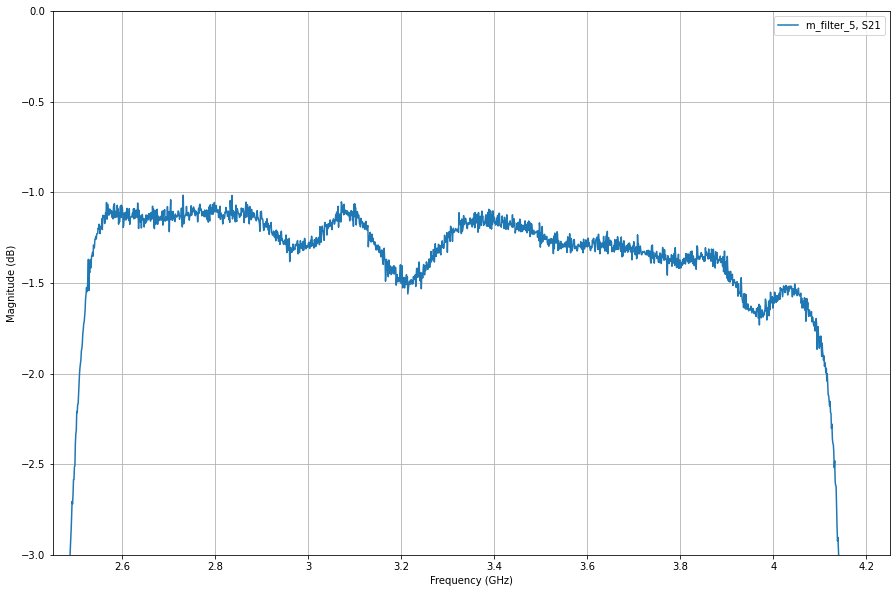

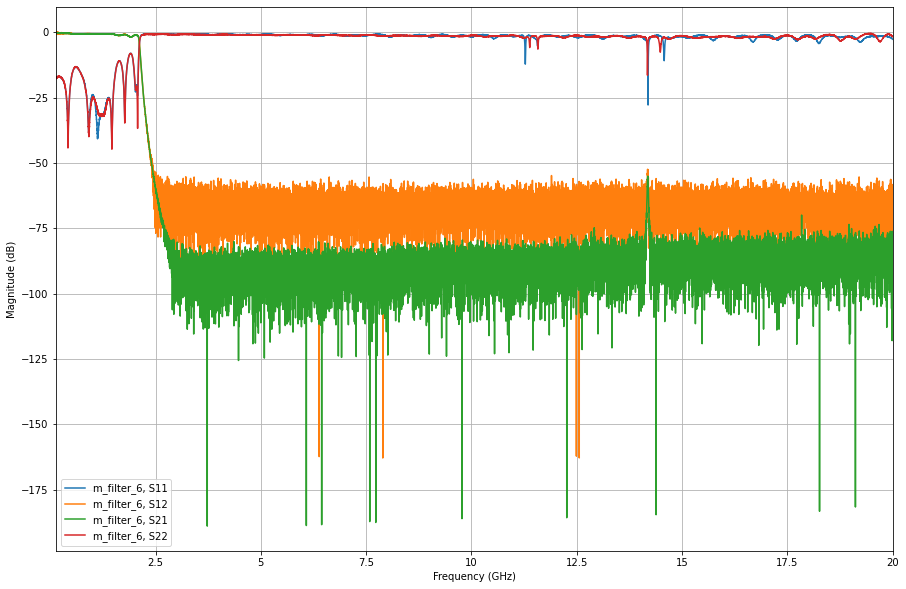

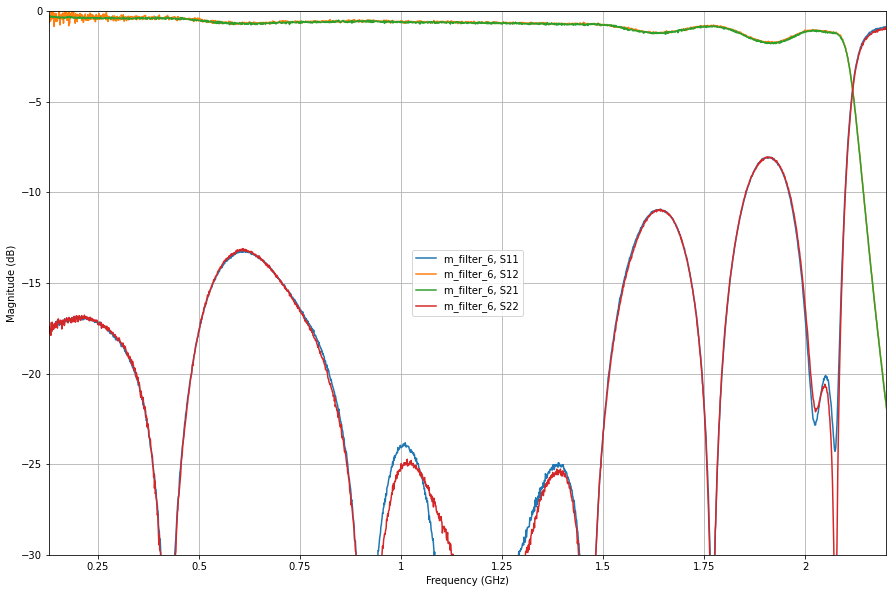

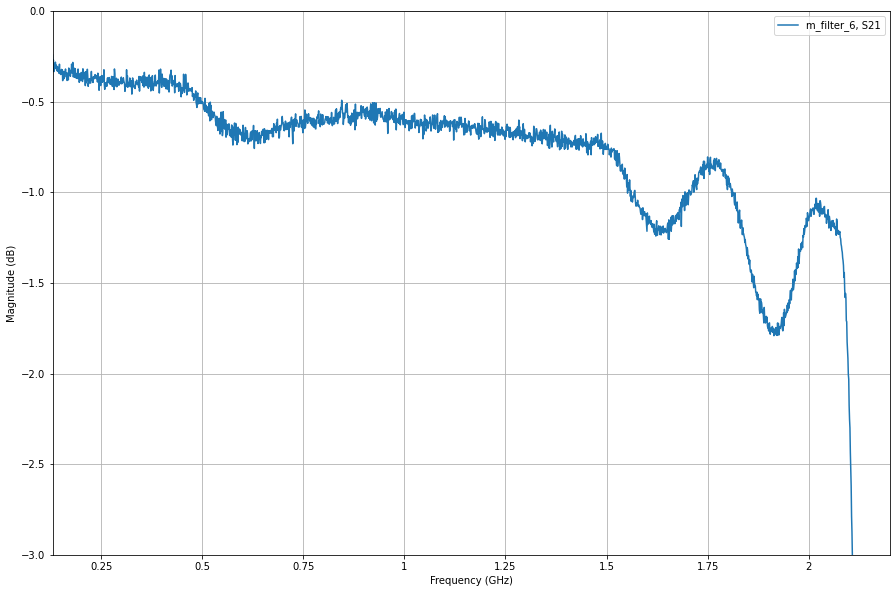

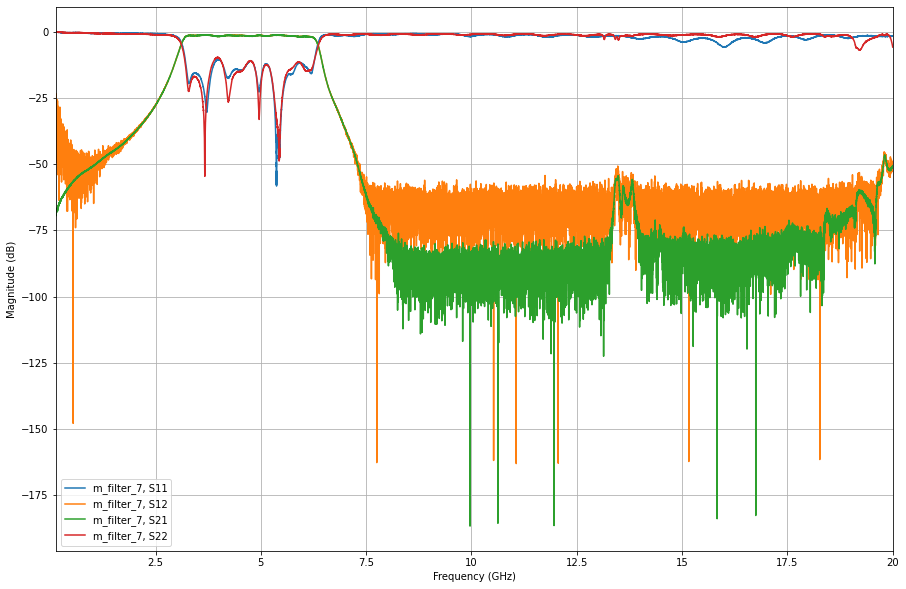

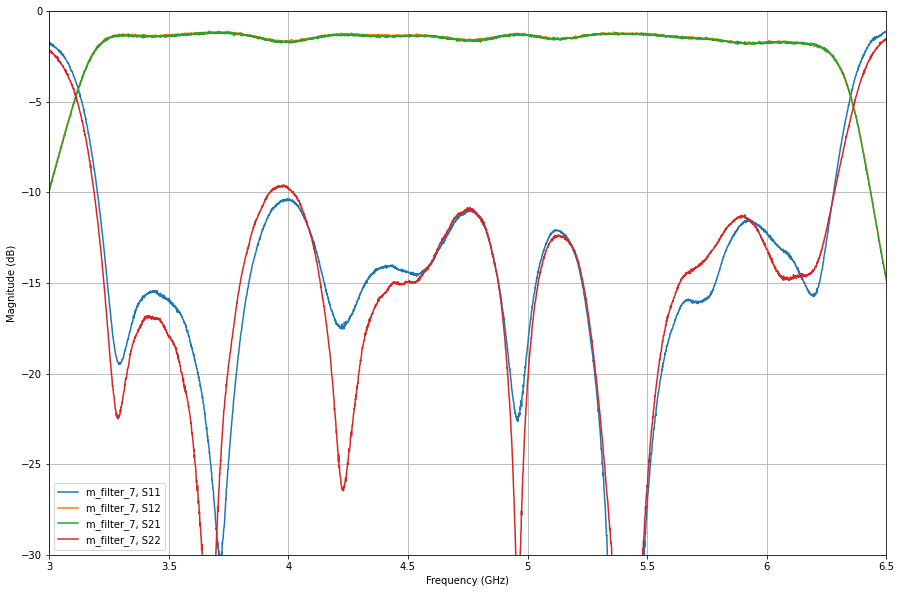

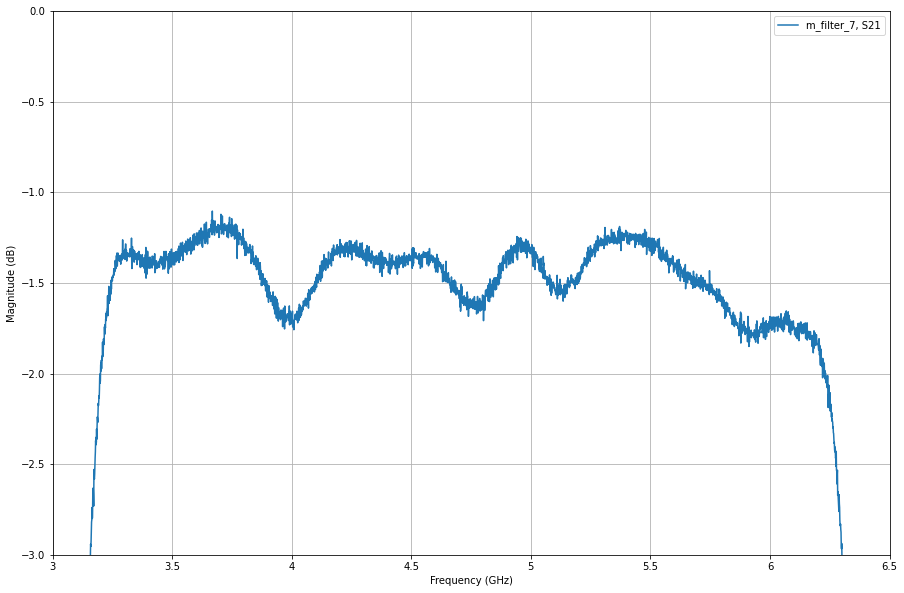

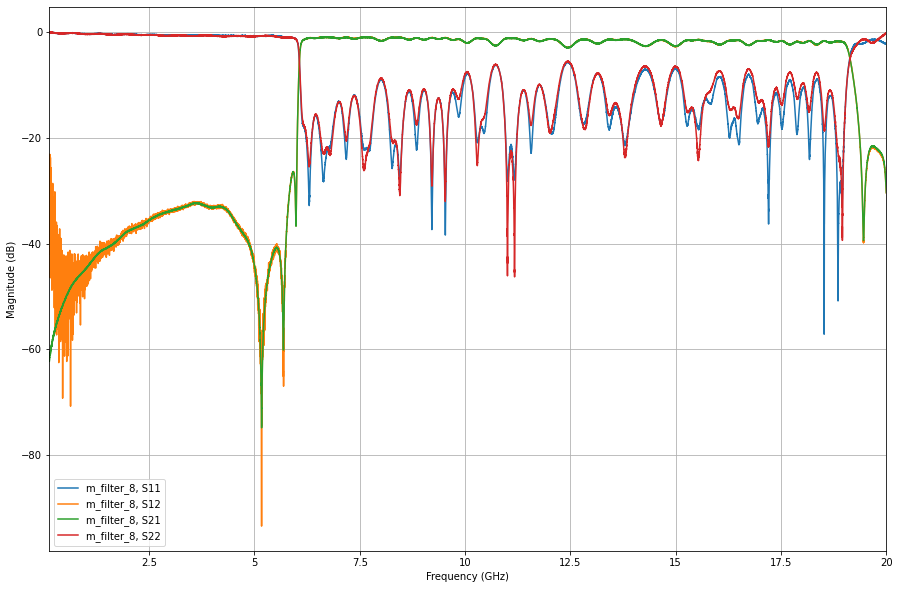

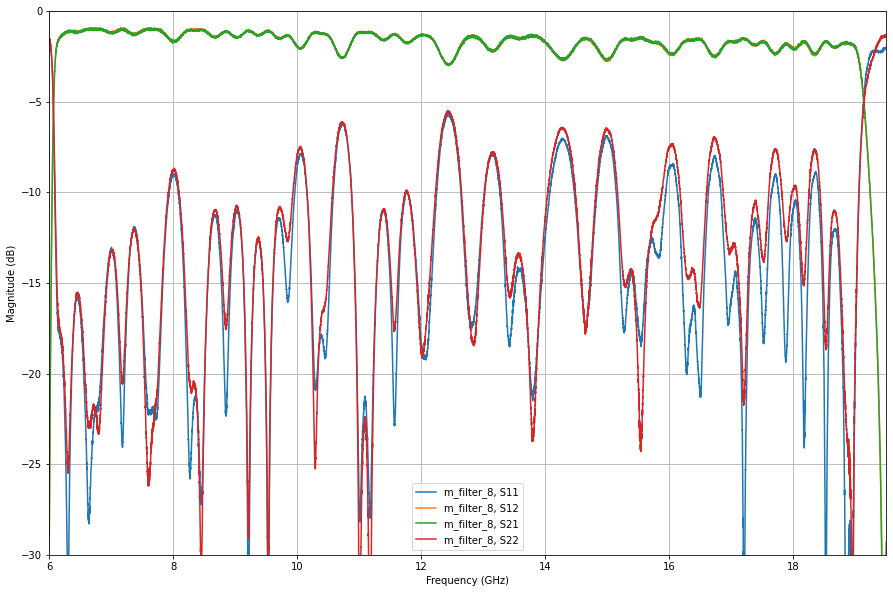

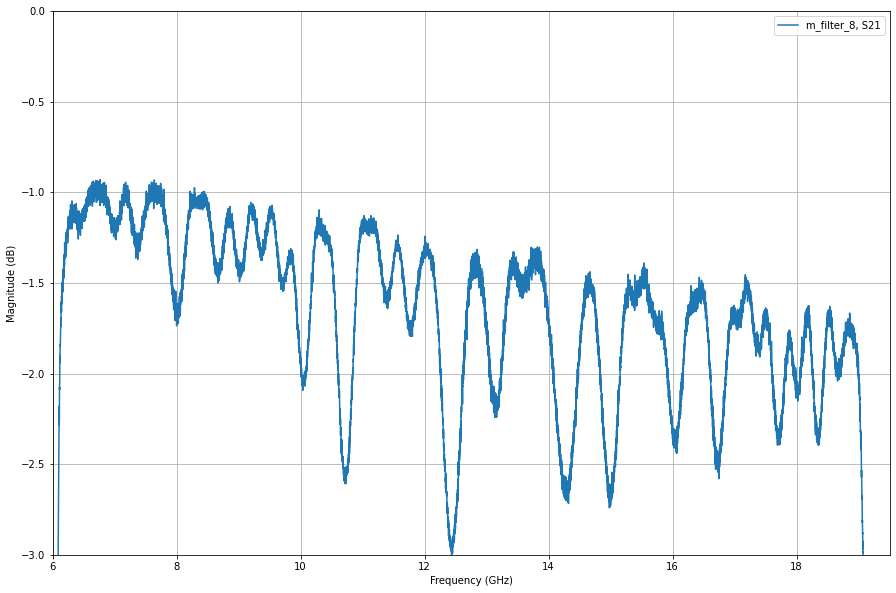

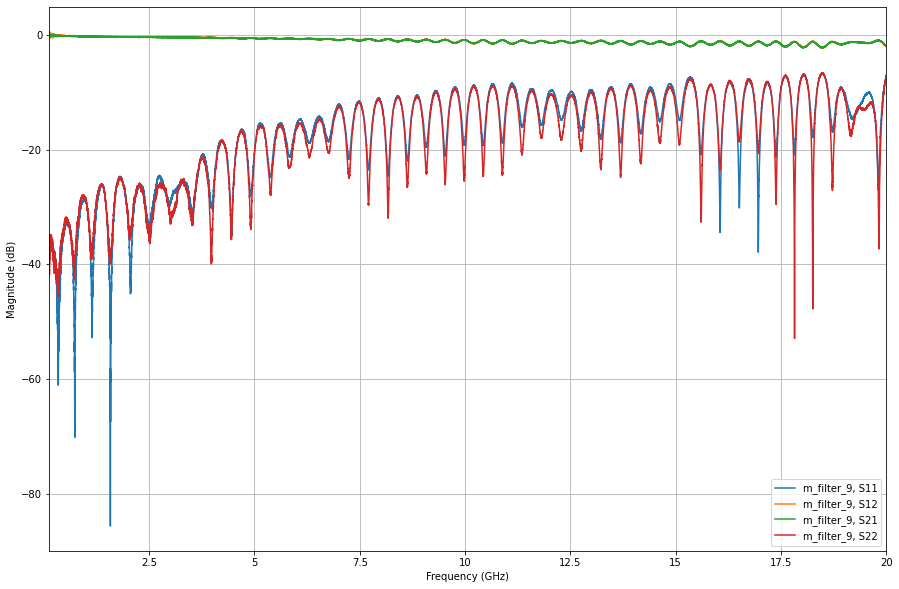

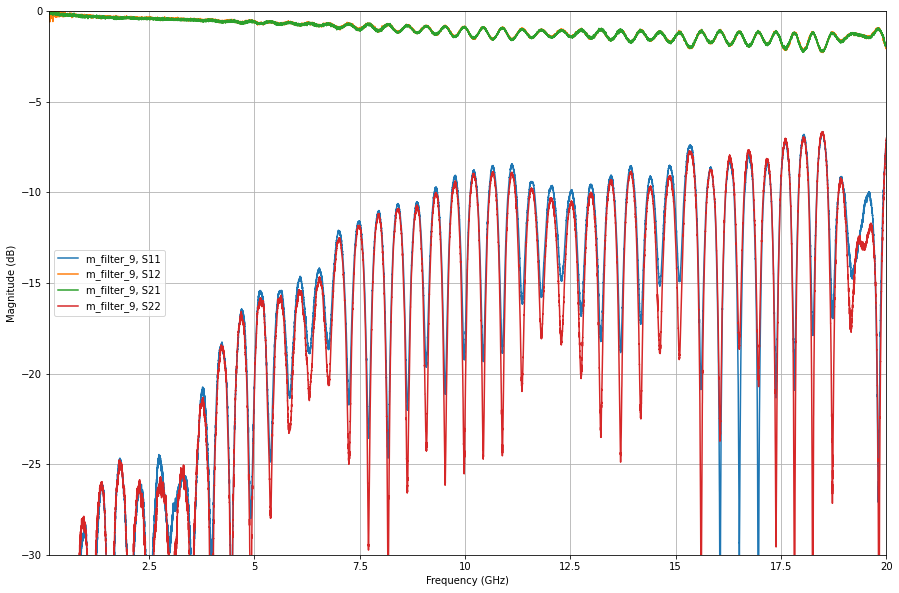

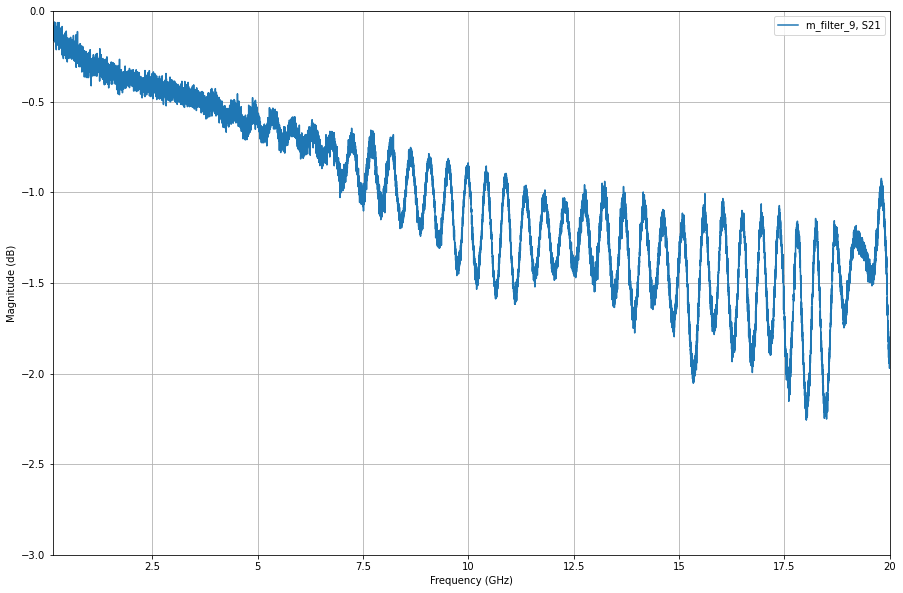

In [60]:
def plotFilterData(f, fstart, fstop):
    fc=cal.apply_cal(f)
    plt.figure();
    fc.plot_s_db();
    plt.grid()
    plt.figure();
    fc.plot_s_db();
    plt.grid()
    plt.ylim([-30, 0])
    plt.xlim([fstart, fstop])
    plt.figure();
    fc.plot_s_db(m=1, n=0);
    plt.grid()
    plt.ylim([-3, 0])
    plt.xlim([fstart, fstop])


plotFilterData(m_filter1, 250e6, 0.45e9)
plotFilterData(m_filter2, 600e6, 1.1e9)
plotFilterData(m_filter3, 1e9, 1.6e9)
plotFilterData(m_filter4, 1.45e9, 2.65e9)
plotFilterData(m_filter5, 2.45e9, 4.25e9)
plotFilterData(m_filter6, 0.13e9, 2.2e9)
plotFilterData(m_filter7, 3e9, 6.5e9)
plotFilterData(m_filter8,6e9, 19.5e9)
plotFilterData(m_filter9,0.13e9, 20e9)


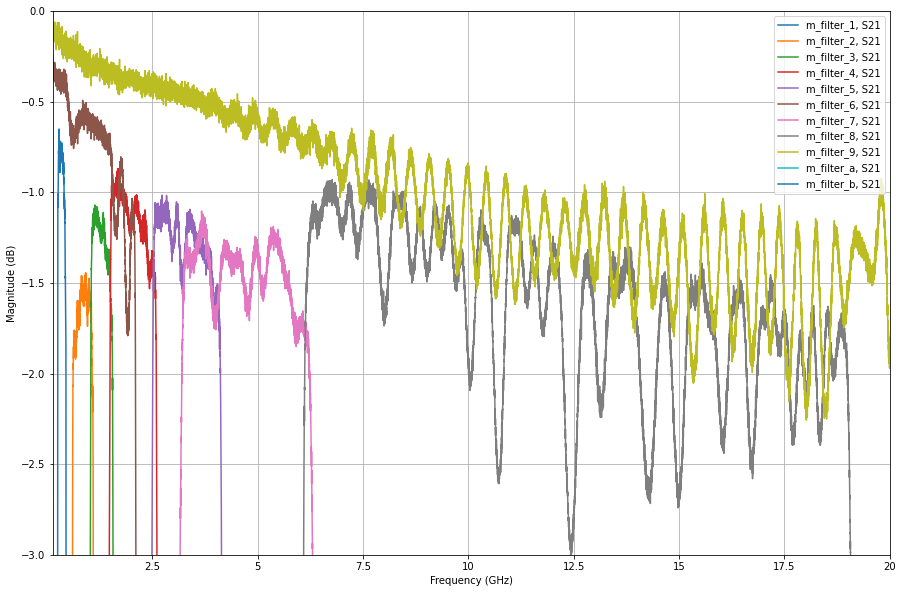

In [47]:

for f in filters:
    fc=cal.apply_cal(f)
    fc.plot_s_db(m=1, n=0);
    plt.grid(True)
    plt.ylim([-3, 0])
   